In [1]:
%matplotlib inline
import pandas as pd

# importing the traffic data, converting the dates to the datetime object
data_url ='https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167'
data = pd.read_csv(data_url, parse_dates=['count_end_date'])
data['count_end_date'] = pd.to_datetime(data['count_end_date'], format='%Y-%m-%d')

# narrowing the data, getting rid of old and null values
data = data[['count_end_date','average_daily_car_traffic','neighborhood']]
data = data.loc[(data['count_end_date'] >= '2019-01-01')]
data = data.loc[(data['average_daily_car_traffic'] > 0)]

# taking statistics from the useful data
stat = data.groupby("neighborhood").describe()
stat = stat.loc[(stat['average_daily_car_traffic']['count'] > 1)]

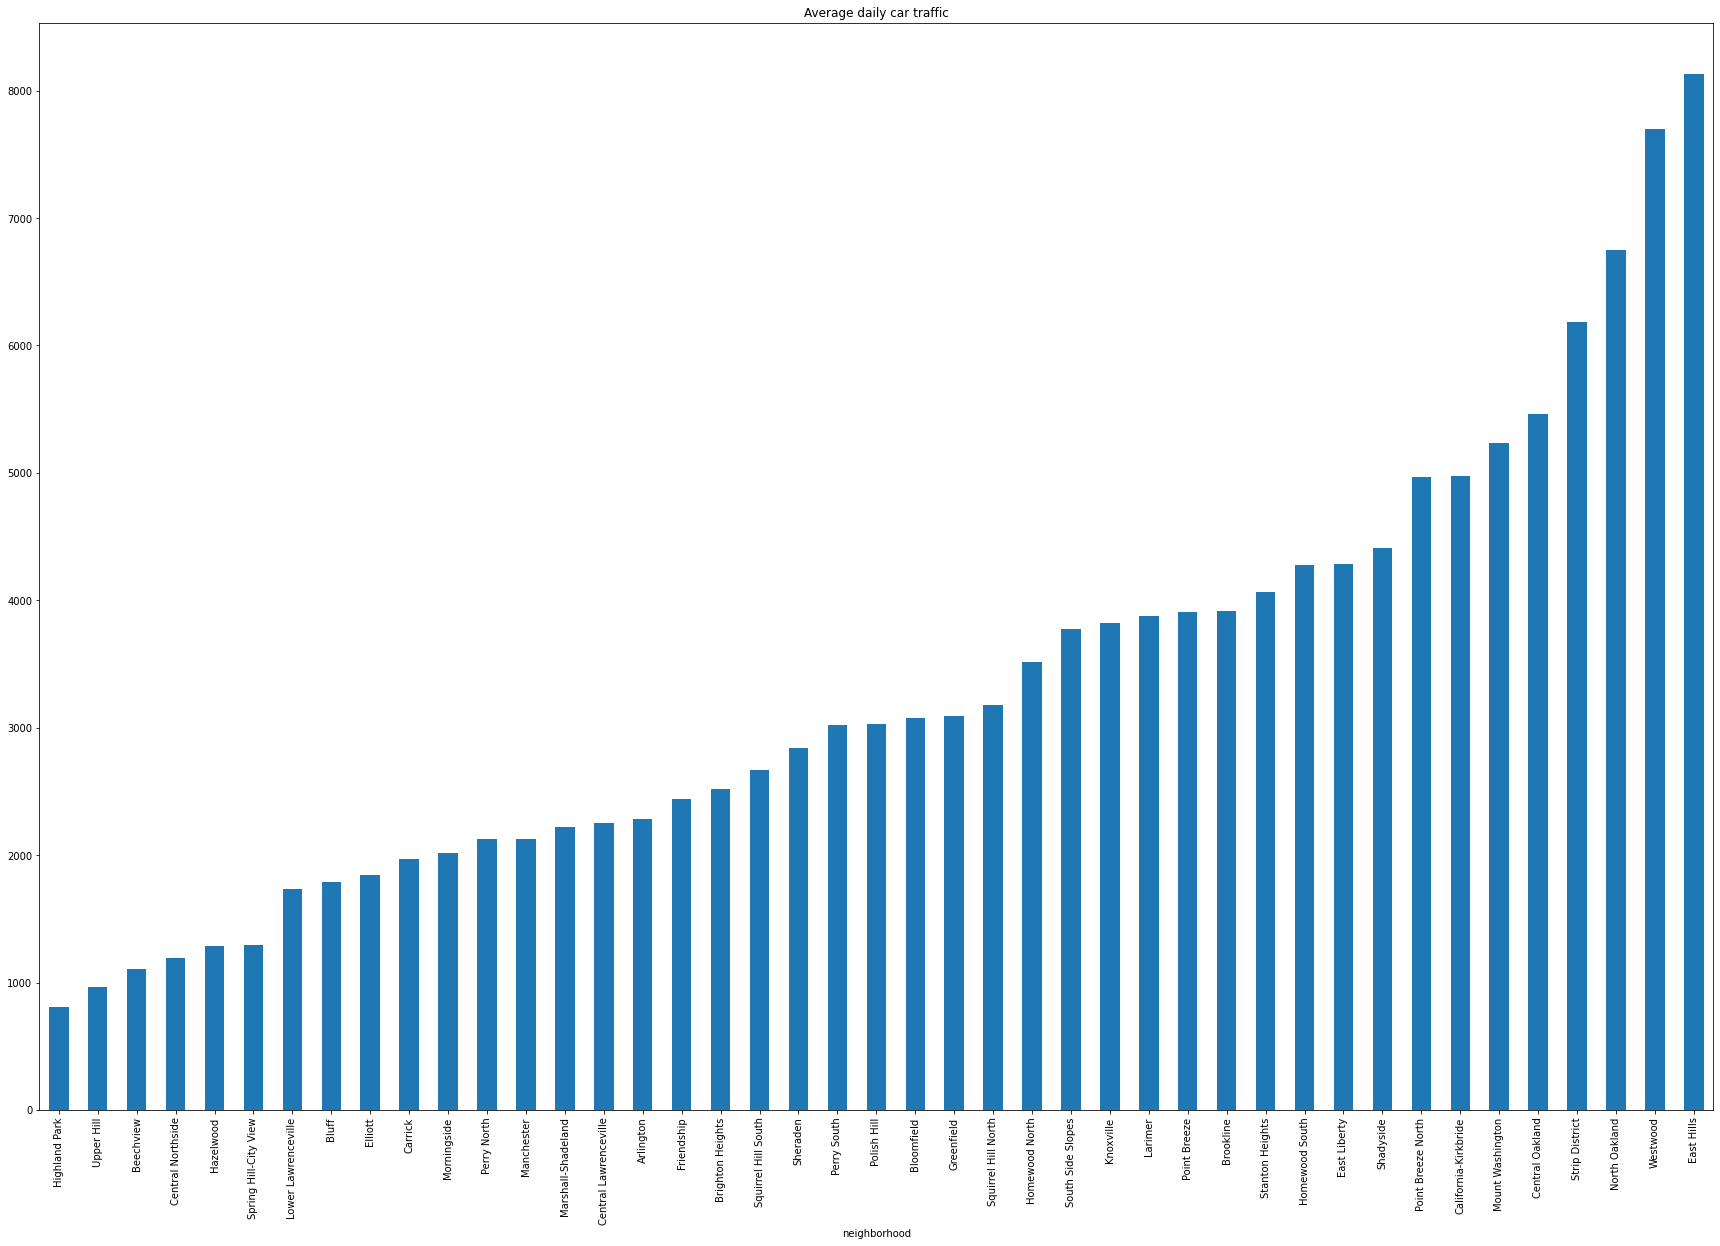

In [2]:
# le ebic matplotlib
stat['average_daily_car_traffic']['mean'].sort_values().plot(kind='bar', figsize=(30,20), title='Average daily car traffic')

In [97]:
# numbers
stat['average_daily_car_traffic']['mean'].describe()

count      43.000000
mean     3304.921786
std      1757.699330
min       804.307692
25%      2068.688889
50%      3025.200000
75%      4171.100000
max      8126.500000
Name: mean, dtype: float64